In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Perform necessary imports

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [5]:
df = pd.read_csv('IMDB Dataset.csv')

In [6]:
# df = pd.read_pickle('./cleaned_df.pkl')

In [7]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Check for null values

In [8]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

**No null values are present. Hence we are good to go.**

# Check the distribution of positive and negative reviews

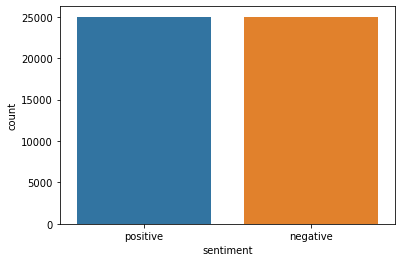

In [9]:
sns.countplot(x=df['sentiment'])

In [10]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

**We have equal number of positive and negative reviews**

# Count the length of reviews

In [11]:
review_length = [len(review.split()) for review in df['review']]

In [12]:
df["review_len"] = review_length

In [13]:
df.head(10)

,review,sentiment,review_len
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
5,"Probably my all-time favorite movie, a story o...",positive,119
6,I sure would like to see a resurrection of a u...,positive,150
7,"This show was an amazing, fresh & innovative i...",negative,174
8,Encouraged by the positive comments about this...,negative,130
9,If you like original gut wrenching laughter yo...,positive,33


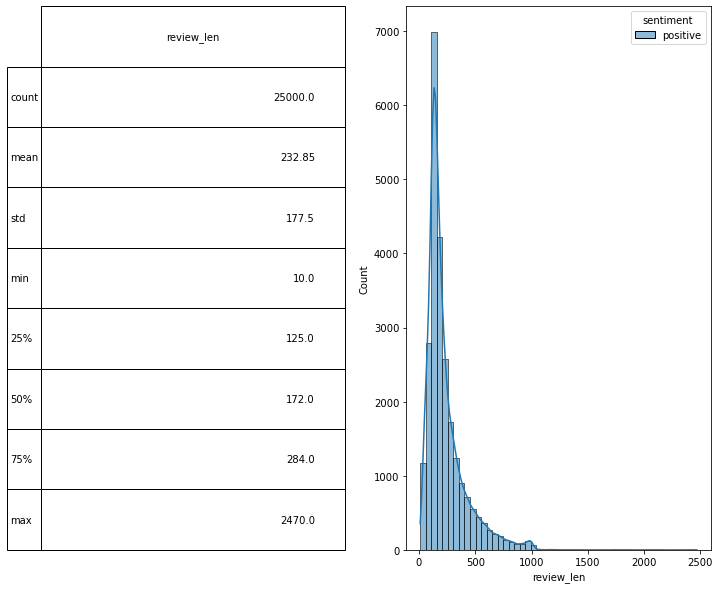

In [14]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(122)
sns.histplot(data=df[df["sentiment"] == "positive"], x = "review_len", ax = ax1, kde=True, hue="sentiment", bins=50)
describe = df.review_len[df["sentiment"] == "positive"].describe().to_frame().round(2)
#print(describe)

ax2 = fig.add_subplot(121)
ax2.axis("off")
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index,bbox=bbox, colLabels=describe.columns)
plt.show()

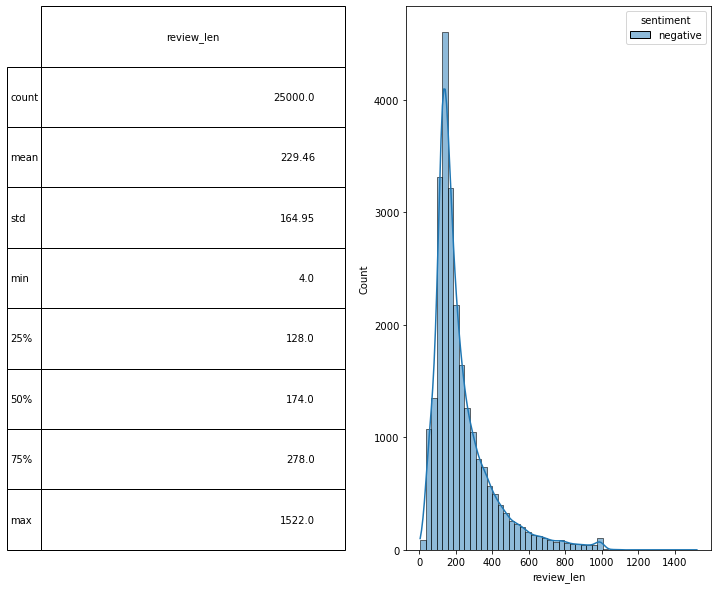

In [15]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(122)
sns.histplot(data=df[df["sentiment"] == "negative"], x = "review_len", ax = ax1, kde=True, hue="sentiment", bins=50)
describe = df.review_len[df["sentiment"] == "negative"].describe().to_frame().round(2)
#print(describe)

ax2 = fig.add_subplot(121)
ax2.axis("off")
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index,bbox=bbox, colLabels=describe.columns)
plt.show()

# Wordcloud

In [18]:
from wordcloud import WordCloud

## Wordcloud for positive sentiments

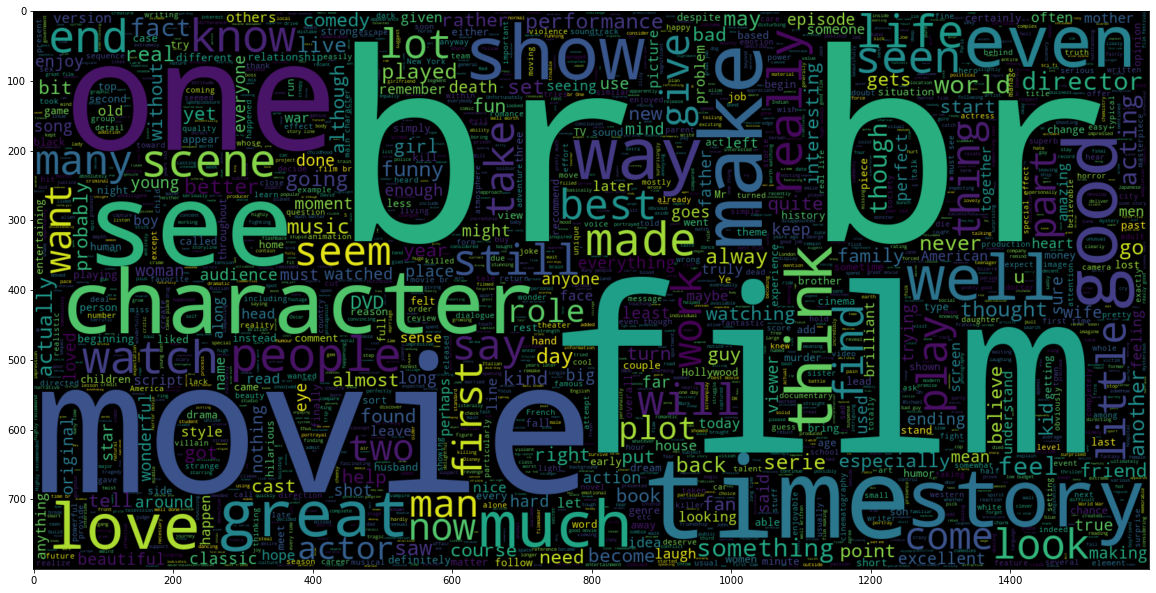

In [19]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'positive'].review))                                                                       
plt.imshow(wc, interpolation='bilinear')

## Wordcloud for negative sentiments

In [20]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 200 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'negative'].review))                                                                       
plt.imshow(wc, interpolation='bilinear')

We see words like "br" appearing in the word cloud. This shows that our dataset needs preprocessing.

# Feature Engineering

## Data cleaning

In [21]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

* Remove characters other than alphabets
* Lemmatize the words so that all the words get reduced to their root words
* Change the words to lowercase so that 'Girl' and 'girl' are not considered as two unique words.

In [22]:
# lemmatizer = WordNetLemmatizer()

# doc = []

# for i in range(len(df)):
#     clean_text = re.sub('[^a-zA-Z]', ' ', df['review'][i] )
#     clean_text = clean_text.lower()
#     clean_text = clean_text.split()
#     clean_text = [lemmatizer.lemmatize(word) for word in clean_text if word not in set(stopwords.words('english'))]
#     clean_text = ' '.join(clean_text)
#     doc.append(clean_text)

## Sentiment Mapping
Computers understand only binary, so we convert 'positive' and 'negative' sentiments into binary form.
positive: 0
negative: 1

In [23]:
label_sentiment = {'positive': 0, 'negative': 1}

y = df.sentiment.map(label_sentiment)

We define 3 functions for carrying out three different tasks:
1. Remove HTML tags from the reviews
2. Remove special characters other than alphabets from the review
3. Remove stopwords from the review

In [24]:
def clean_html(text):
    clean_text = re.sub('<.*>', '', text)
    return clean_text
    
def clean_spcl_chars(text):
    clean_text = re.sub('[^a-zA-Z]', ' ', text) 
    return clean_text

def remove_stopwords(text):
    clean_text = []
    text = text.split()
    for word in text:
        if word not in stopwords.words('english'):
            clean_text.append(word)
    return ' '.join(clean_text)
    

Remove the HTML tags

In [25]:
df["clean_review"] = df.review.apply(clean_html)

In [26]:
df.head()

,review,sentiment,review_len,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,A wonderful little production. The realism rea...
2,I thought this was a wonderful way to spend ti...,positive,166,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,"Petter Mattei's ""Love in the Time of Money"" is..."


Remove special characters

In [27]:
df.clean_review = df.clean_review.apply(clean_spcl_chars)
df.head()

,review,sentiment,review_len,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,A wonderful little production The realism rea...
2,I thought this was a wonderful way to spend ti...,positive,166,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,Basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,Petter Mattei s Love in the Time of Money is...


Remove stopwords

In [28]:
df.clean_review = df.clean_review.apply(remove_stopwords)
df.head()

,review,sentiment,review_len,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,One reviewers mentioned watching Oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,162,A wonderful little production The realism real...
2,I thought this was a wonderful way to spend ti...,positive,166,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,138,Basically family little boy Jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,Petter Mattei Love Time Money visually stunnin...


## Lemmatize the words

In [29]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

In [30]:
df['lemmatized_review'] = df['clean_review'].apply(lemmatize_text)
df.head()

,review,sentiment,review_len,clean_review,lemmatized_review
0,One of the other reviewers has mentioned that ...,positive,307,One reviewers mentioned watching Oz episode ho...,One reviewer mentioned watching Oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,162,A wonderful little production The realism real...,A wonderful little production The realism real...
2,I thought this was a wonderful way to spend ti...,positive,166,I thought wonderful way spend time hot summer ...,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,138,Basically family little boy Jake thinks zombie...,Basically family little boy Jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,Petter Mattei Love Time Money visually stunnin...,Petter Mattei Love Time Money visually stunnin...


## Save the cleaned review dataframe as pickle object, so that I don't have to run the cleaning process everytime I open this notebook

In [31]:
df.to_pickle('cleaned_df.pkl')

# Vectorize review
We will use Term frequency - inverse document frequency (Tf-idf) as for vectorizing the reviews

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [33]:
X = df['lemmatized_review']
#X = TfidfVectorizer().fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33500,) (33500,)
(16500,) (16500,)


## Training Pipeline
We will create a pipeline for diffrent classifiers

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

In [38]:
pipe1 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB() )])
pipe2 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC() )])
pipe3 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier() )])

In [41]:
pipes = [pipe1, pipe2, pipe3]
log = []
for i,pipe in enumerate(pipes):
    name = f'pipe_{i}'
    pipe.fit(X_train, y = y_train)
    y_pred = pipe.predict(X_test)
    print('*****RESULTS*****')
    acc = accuracy_score(y_test, y_pred).round(2)
    log.append((name, acc))
    print(classification_report(y_test, y_pred))
    print(pipe.score(X_test, y_test))

*****RESULTS*****
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      8292
           1       0.84      0.85      0.85      8208

    accuracy                           0.84     16500
   macro avg       0.84      0.84      0.84     16500
weighted avg       0.84      0.84      0.84     16500

0.8446060606060606
*****RESULTS*****
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8292
           1       0.86      0.84      0.85      8208

    accuracy                           0.86     16500
   macro avg       0.86      0.86      0.86     16500
weighted avg       0.86      0.86      0.86     16500

0.8554545454545455
*****RESULTS*****
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      8292
           1       0.84      0.81      0.82      8208

    accuracy                           0.83     16500
   macro avg       0.83      0.83   

In [42]:
log

[('pipe_0', 0.8446060606060606),
 ('pipe_1', 0.8554545454545455),
 ('pipe_2', 0.8262424242424242)]

In [43]:
clf_list = ['MultinomialNB', 'LinearSVC', 'RandomForset']

In [47]:
accuracy = [log[i][1].round(2) for i in range(len(log))]

In [49]:
accuracy

[0.84, 0.86, 0.83]

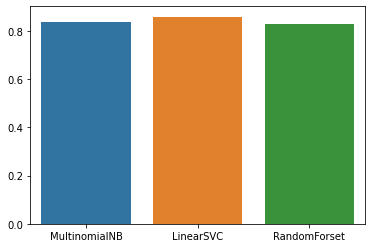

In [50]:
sns.barplot(x=clf_list, y = accuracy)

LinearSVC has the highest accuracy of 86%